# Boro Player Predictions - Current Market Value

In [1]:
## standard library
import os
import sys
import re
import pickle
import shutil

In [2]:
## data wrangling
import numpy as np
import pandas as pd

pd.set_option("display.latex.repr", True)

In [3]:
## visualisation
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
sns.set()

In [4]:
## machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [5]:
## project src
sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../src'))
# sys.path

%load_ext autoreload
%autoreload 2

# import utilities
import players

In [6]:
## global constants
RANDOM_STATE = 4

## 1. Business Understanding

* Determine Busines Objectives
* Situation Assessment
* Determine Data Mining Goal
* Produce Project Plan

The aim of this project is to see if we can use data on players at Middlesbrough Football Club to make preditions about the player's and the team's current and future performance.

We have player data from Transfermarkt, ESPN, WhoScored and Fly Me To The Moon (fanzine).

"Performance" could be measured in many different ways: Results on the pitch, market value, fan popularity, churn, ...

A number of key performance metrics will be investigated in turn, looking at how predictable each is...

1) Current market value

2) Current fan popularity

3) Current performance rating

... and more TBC ...


## 2. Data Understanding

* Collect Initial Data
* Describe Data
* Explore Data
* Verify Data Quality

In [7]:
print("Loading Transfermarkt general information...")

tmk_df = players.clean_data("tmk_cnt")
# tmk_df.info()

Loading Transfermarkt general information...
tmk_cnt_mbr_all_0910.csv
tmk_cnt_mbr_all_1011.csv
tmk_cnt_mbr_all_1112.csv
tmk_cnt_mbr_all_1213.csv
tmk_cnt_mbr_all_1314.csv
tmk_cnt_mbr_all_1415.csv
tmk_cnt_mbr_all_1516.csv
tmk_cnt_mbr_all_1617.csv
tmk_cnt_mbr_all_1718.csv
tmk_cnt_mbr_all_1819.csv
tmk_cnt_mbr_all_1920.csv


In [8]:
print("Random sample of records...")

tmk_df.sample(8, random_state=RANDOM_STATE)

Random sample of records...


Shirt number            Position                 Name Date of birth  Height   Foot     Joined Contract expires  Market value Season Position group  Age
240          16.0      Centre Forward  Bartholomew Ogbeche    1984-10-01   178.0   both 2011-10-01              NaT         0.450  11/12              F   26
518           7.0    Central Midfield    Grant Leadbitter     1986-01-07   177.0  right 2012-07-01       2017-06-30         1.500  15/16              M   30
611          13.0              Keeper         Tomás Mejías    1989-01-30   195.0  right 2014-07-05       2018-06-30         0.225  17/18              G   29
28            3.0           Left-Back        Andrew Taylor    1986-08-01   178.0   left 2005-07-01              NaT         1.880  09/10              D   22
274           2.0          Right-Back         Justin Hoyte    1984-11-20   180.0  right 2008-08-01              NaT         1.130  12/13              D   27
48           34.0  Defensive Midfield      Isaiah Osbourne    1987-11-05   188.0  right 2009-11-06              NaT         0.375  09/10              M   21
618           4.0         Centre-Back         Daniel Ayala    1990-11-07   190.0  right 2014-01-24       2020-06-30         1.800  17/18              D   27
198           3.0           Left-Back          Joe Bennett    1990-03-28   177.0   left 2008-07-01              NaT         0.188  11/12              D   21

In [9]:
print("Summary of whole data source...")

tmk_df.describe(include="all")

Summary of whole data source...


Shirt number     Position        Name        Date of birth      Height   Foot               Joined     Contract expires  Market value Season Position group         Age
count     333.000000          364         364                  364  356.000000    324                  351                  169    330.000000    364            364  364.000000
unique           NaN           19         172                  169         NaN      3                  126                   12           NaN     11              4         NaN
top              NaN  Centre Back  Ben Gibson  1993-01-15 00:00:00         NaN  right  2010-07-01 00:00:00  2020-06-30 00:00:00           NaN  09/10              M         NaN
freq             NaN           53           9                    9         NaN    201                   31                   28           NaN     47            134         NaN
first            NaN          NaN         NaN  1973-08-27 00:00:00         NaN    NaN  2000-07-01 00:00:00  2016-05-31 00:00:00           NaN    NaN            NaN         NaN
last             NaN          NaN         NaN  2000-08-09 00:00:00         NaN    NaN  2020-01-31 00:00:00  2023-06-30 00:00:00           NaN    NaN            NaN         NaN
mean       18.054054          NaN         NaN                  NaN  183.286517    NaN                  NaN                  NaN      1.696327    NaN            NaN   24.826923
std        11.018471          NaN         NaN                  NaN    6.028752    NaN                  NaN                  NaN      1.776398    NaN            NaN    4.696900
min         1.000000          NaN         NaN                  NaN  167.000000    NaN                  NaN                  NaN      0.038000    NaN            NaN   16.000000
25%         8.000000          NaN         NaN                  NaN  179.000000    NaN                  NaN                  NaN      0.375000    NaN            NaN   21.000000
50%        18.000000          NaN         NaN                  NaN  183.000000    NaN                  NaN                  NaN      1.130000    NaN            NaN   25.000000
75%        26.000000          NaN         NaN                  NaN  188.000000    NaN                  NaN                  NaN      2.250000    NaN            NaN   28.000000
max        42.000000          NaN         NaN                  NaN  199.000000    NaN                  NaN                  NaN     10.800000    NaN            NaN   40.000000

**ANALYSIS:** So the data is looking broadly in good shape, but there are a few missing values to consider...

In [10]:
# print("% populated...")

pd.DataFrame(100 * tmk_df.count() / tmk_df.shape[0], columns=["% populated"])

% populated
Shirt number        91.483516
Position           100.000000
Name               100.000000
Date of birth      100.000000
Height              97.802198
Foot                89.010989
Joined              96.428571
Contract expires    46.428571
Market value        90.659341
Season             100.000000
Position group     100.000000
Age                100.000000

**ANALYSIS:** Only `Joined` has large gaps. Let's look at it in more detail...

In [11]:
print("Players with missing Joined dates...")

tmk_df.loc[tmk_df.Name.isin(tmk_df[tmk_df.Joined.notna()].Name.values)
       & tmk_df.Name.isin(tmk_df[tmk_df.Joined.isna()].Name.values)].sort_values(by=["Name", "Season"])[["Name", "Season", "Joined"]].T

Players with missing Joined dates...


156                  220                  300                  374                  454         26                   120                  194                  266                  348                  416                  490                  547                  616            24                   122          282                  364                  440                  512           60            154                  218                  298            102                  182                  250                  334                  406                  482                  542            92                   174                  242                  322                  396                  476
Name    Adam Reach           Adam Reach           Adam Reach           Adam Reach           Adam Reach  Ben Gibson           Ben Gibson           Ben Gibson           Ben Gibson           Ben Gibson           Ben Gibson           Ben Gibson           Ben Gibson           Ben Gibson  Bruno Pilatos        Bruno Pilatos  Bryn Morris          Bryn Morris          Bryn Morris          Bryn Morris  Cameron Park  Cameron Park         Cameron Park         Cameron Park  Connor Ripley        Connor Ripley        Connor Ripley        Connor Ripley        Connor Ripley        Connor Ripley        Connor Ripley  Luke Williams        Luke Williams        Luke Williams        Luke Williams        Luke Williams        Luke Williams
Season       10/11                11/12                12/13                13/14                14/15       09/10                10/11                11/12                12/13                13/14                14/15                15/16                16/17                17/18          09/10                10/11        12/13                13/14                14/15                15/16         09/10         10/11                11/12                12/13          10/11                11/12                12/13                13/14                14/15                15/16                16/17          09/10                10/11                11/12                12/13                13/14                14/15
Joined         NaT  2011-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00         NaT  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00            NaT  2010-07-01 00:00:00          NaT  2014-01-01 00:00:00  2014-01-01 00:00:00  2014-01-01 00:00:00           NaT           NaT  2011-07-01 00:00:00  2011-07-01 00:00:00            NaT  2011-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00  2011-07-01 00:00:00            NaT  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00  2010-07-01 00:00:00

**ANALYSIS:** _Possibly_ we could back fill some missing `Joined` dates but this might have some downstream consequences because the date _might_ exceed the end of that season. We'll leave them as Nulls for now.

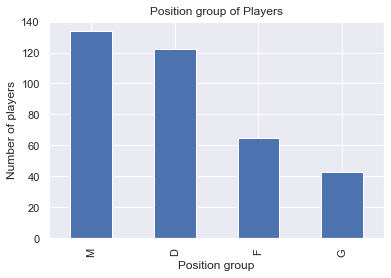

In [12]:
tmk_df["Position group"].value_counts().plot(kind='bar')
plt.title('Position group of Players')
plt.xlabel('Position group')
plt.ylabel('Number of players');

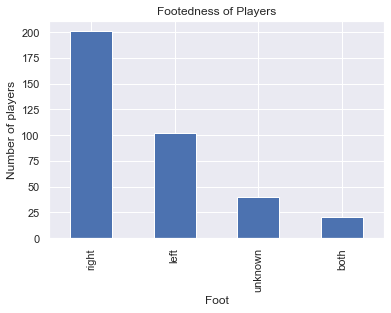

In [13]:
tmk_df.Foot.fillna("unknown").value_counts().plot(kind='bar')
plt.title('Footedness of Players')
plt.xlabel('Foot')
plt.ylabel('Number of players');

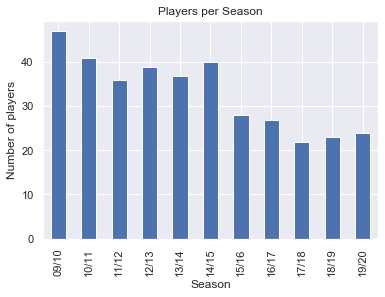

In [14]:
tmk_df.Season.value_counts().sort_index().plot(kind='bar')
plt.title('Players per Season')
plt.xlabel('Season')
plt.ylabel('Number of players');

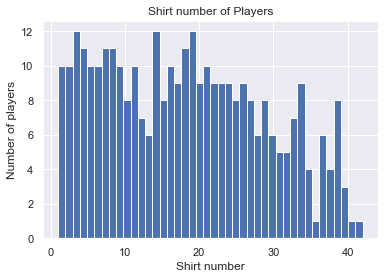

In [15]:
tmk_df["Shirt number"].hist(bins=42)
plt.title('Shirt number of Players')
plt.xlabel('Shirt number')
plt.ylabel('Number of players');

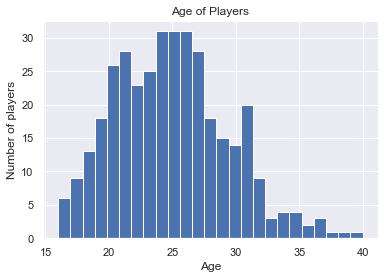

In [16]:
tmk_df["Age"].hist(bins=25)
plt.title('Age of Players')
plt.xlabel('Age')
plt.ylabel('Number of players');

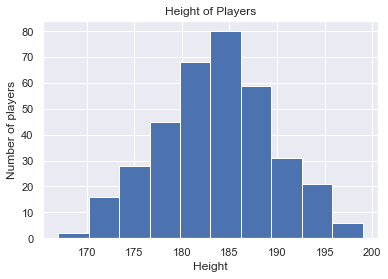

In [17]:
tmk_df["Height"].hist()
plt.title('Height of Players')
plt.xlabel('Height')
plt.ylabel('Number of players');

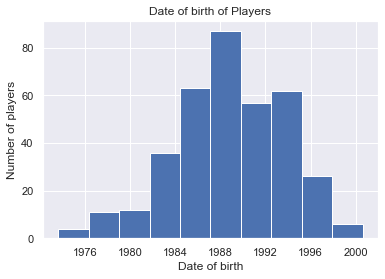

In [18]:
tmk_df["Date of birth"].hist()
plt.title('Date of birth of Players')
plt.xlabel('Date of birth')
plt.ylabel('Number of players');

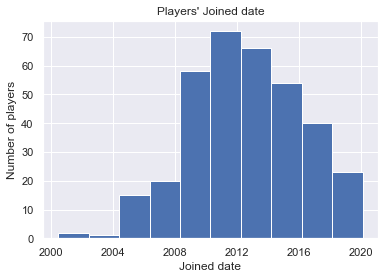

In [19]:
tmk_df["Joined"].hist()
plt.title("Players' Joined date")
plt.xlabel('Joined date')
plt.ylabel('Number of players');

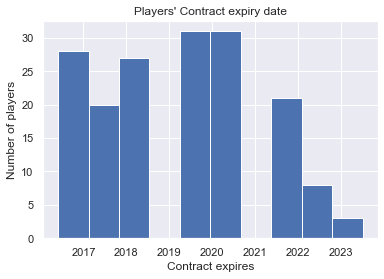

In [20]:
tmk_df["Contract expires"].hist()
plt.title("Players' Contract expiry date")
plt.xlabel('Contract expires')
plt.ylabel('Number of players');

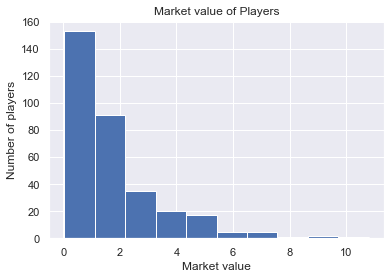

In [21]:
tmk_df["Market value"].hist()
plt.title("Market value of Players")
plt.xlabel('Market value')
plt.ylabel('Number of players');

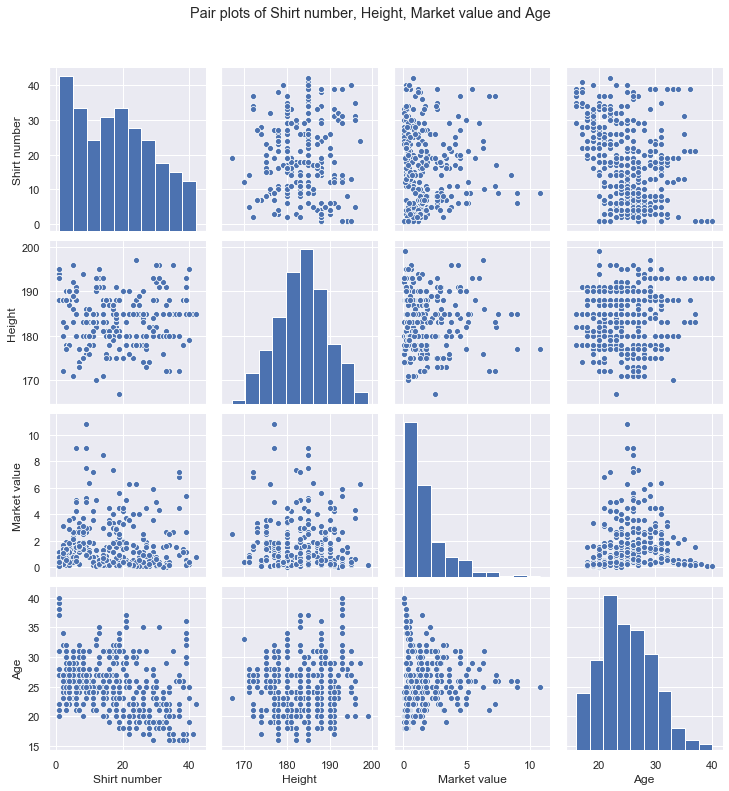

In [22]:
g = sns.pairplot(tmk_df)
g.fig.suptitle("Pair plots of Shirt number, Height, Market value and Age", y=1.08);

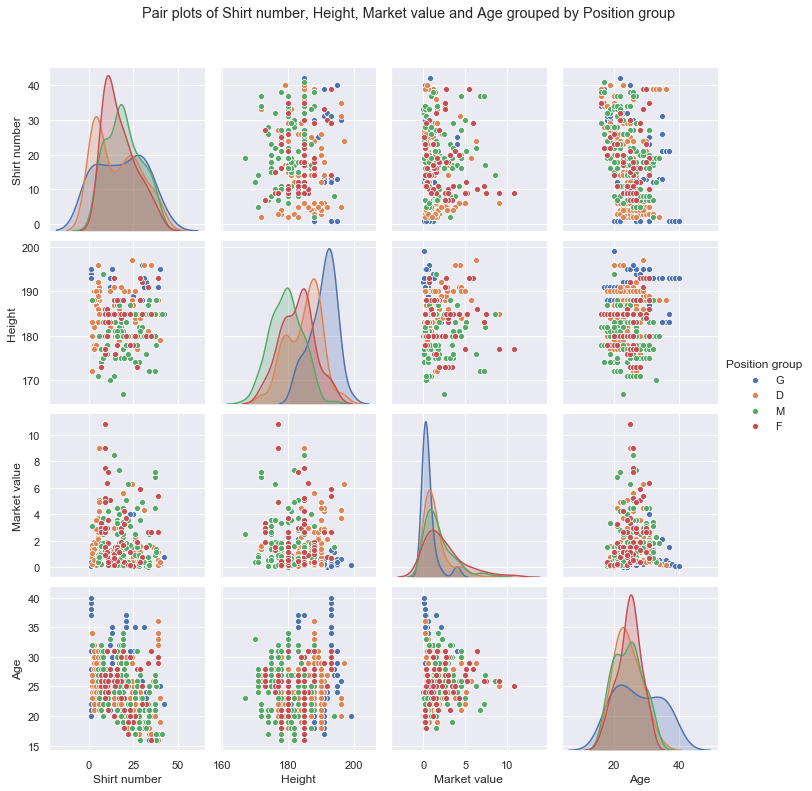

In [23]:
g = sns.pairplot(tmk_df, hue="Position group")
g.fig.suptitle("Pair plots of Shirt number, Height, Market value and Age grouped by Position group", y=1.08);

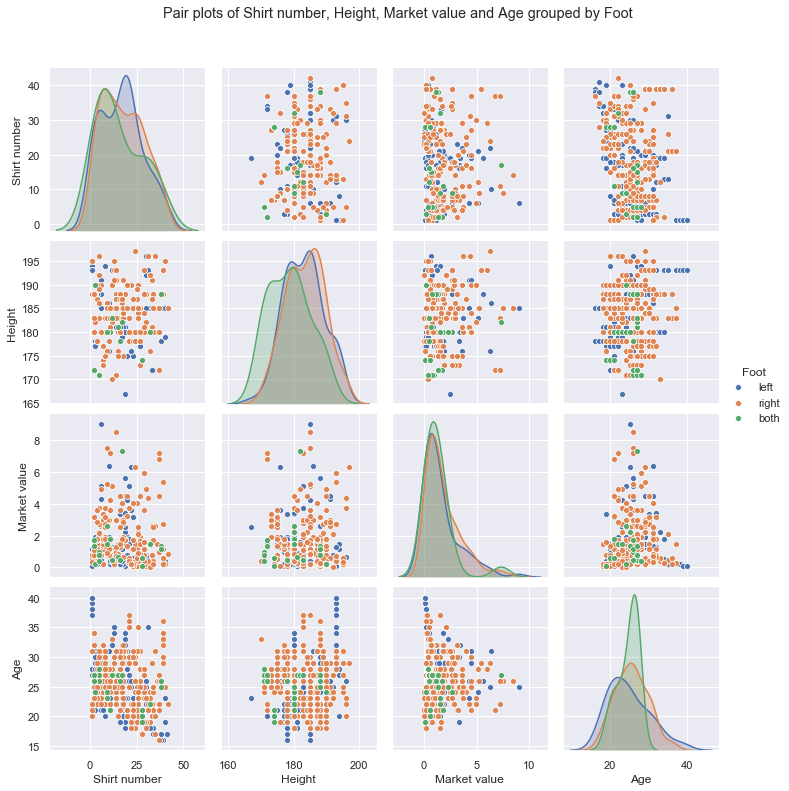

In [24]:
g = sns.pairplot(tmk_df, hue="Foot")
g.fig.suptitle("Pair plots of Shirt number, Height, Market value and Age grouped by Foot", y=1.08);

In [25]:
print("Loading Transfermarkt performance summary...")

# import players
# psm_df = utilities.folder_loader("tmk_psm", ["Shirt number", "Position", "Name", "Age", "Nationality",
#                                 "In squad", "Appearances", "Goals", "Assists", 
#                                     "Yellow cards", "Second yellow cards", "Red cards",
#                                    "Substitutions on", "Substitutions off", "PPG", "Minutes played"])

psm_df = players.clean_data("tmk_psm")
# psm_df.info()

Loading Transfermarkt performance summary...
tmk_psm_mbr_chm_0910.csv
tmk_psm_mbr_chm_1011.csv
tmk_psm_mbr_chm_1112.csv
tmk_psm_mbr_chm_1213.csv
tmk_psm_mbr_chm_1314.csv
tmk_psm_mbr_chm_1415.csv
tmk_psm_mbr_chm_1516.csv
tmk_psm_mbr_chm_1718.csv
tmk_psm_mbr_chm_1819.csv
tmk_psm_mbr_chm_1920.csv
tmk_psm_mbr_cpo_1415.csv
tmk_psm_mbr_cpo_1718.csv
tmk_psm_mbr_fac_0910.csv
tmk_psm_mbr_fac_1011.csv
tmk_psm_mbr_fac_1112.csv
tmk_psm_mbr_fac_1213.csv
tmk_psm_mbr_fac_1314.csv
tmk_psm_mbr_fac_1415.csv
tmk_psm_mbr_fac_1516.csv
tmk_psm_mbr_fac_1617.csv
tmk_psm_mbr_fac_1718.csv
tmk_psm_mbr_fac_1819.csv
tmk_psm_mbr_fac_1920.csv
tmk_psm_mbr_lec_0910.csv
tmk_psm_mbr_lec_1011.csv
tmk_psm_mbr_lec_1112.csv
tmk_psm_mbr_lec_1213.csv
tmk_psm_mbr_lec_1314.csv
tmk_psm_mbr_lec_1415.csv
tmk_psm_mbr_lec_1516.csv
tmk_psm_mbr_lec_1617.csv
tmk_psm_mbr_lec_1718.csv
tmk_psm_mbr_lec_1819.csv
tmk_psm_mbr_lec_1920.csv
tmk_psm_mbr_prm_1617.csv


In [26]:
print("Random sample of records...")

psm_df.sample(8, random_state=RANDOM_STATE)

Random sample of records...


Shirt number            Position              Name   Age  In squad  Appearances  Goals  Assists  Yellow cards  Second yellow cards  Red cards  Substitutions on  Substitutions off   PPG  Minutes played Season   Competition Position group
665            5.0          Right-Back      Ryan Shotton  30.0      33.0         33.0    0.0      1.0           6.0                  0.0        0.0               1.0                4.0  1.58          2787.0  18/19  Championship              D
977            5.0         Centre Back     Chris Riggott  28.0       1.0          1.0    0.0      0.0           0.0                  0.0        0.0               0.0                0.0  0.00            90.0  09/10        FA Cup              D
331           17.0      Centre Forward  Lukas Jutkiewicz  23.0      29.0         24.0    8.0      4.0           1.0                  0.0        0.0               6.0               10.0  1.08          1527.0  12/13  Championship              F
693            8.0  Defensive Midfield      Adam Clayton  30.0      44.0         35.0    0.0      0.0          11.0                  0.0        0.0               6.0                8.0  1.63          2481.0  18/19  Championship              M
1288           4.0         Centre Back     Rhys Williams  24.0       1.0          1.0    0.0      0.0           0.0                  0.0        0.0               0.0                0.0  0.00            90.0  13/14        FA Cup              D
2489           NaN         Centre-Back        Sam Stubbs  20.0       2.0          0.0    0.0      0.0           0.0                  0.0        0.0               0.0                0.0  0.00             0.0  18/19    League Cup              D
1123          34.0              Keeper   Luke Coddington  16.0       0.0          0.0    0.0      0.0           0.0                  0.0        0.0               0.0                0.0  0.00             0.0  11/12        FA Cup              G
2471           4.0         Centre-Back      Daniel Ayala  28.0       4.0          3.0    0.0      1.0           0.0                  0.0        0.0               0.0                2.0  3.00           197.0  18/19    League Cup              D

In [27]:
print("Summary of whole data source...")

psm_df.describe(include="all")

Summary of whole data source...


Shirt number     Position        Name          Age     In squad  Appearances        Goals      Assists  Yellow cards  Second yellow cards    Red cards  Substitutions on  Substitutions off          PPG  Minutes played Season Competition Position group
count    1049.000000         1262        1262  1262.000000  1262.000000  1262.000000  1262.000000  1262.000000   1262.000000          1262.000000  1262.000000       1262.000000        1262.000000  1262.000000     1262.000000   1262        1262           1262
unique           NaN           20         199          NaN          NaN          NaN          NaN          NaN           NaN                  NaN          NaN               NaN                NaN          NaN             NaN     11           5              4
top              NaN  Centre Back  Ben Gibson          NaN          NaN          NaN          NaN          NaN           NaN                  NaN          NaN               NaN                NaN          NaN             NaN  14/15  League Cup              M
freq             NaN          176          29          NaN          NaN          NaN          NaN          NaN           NaN                  NaN          NaN               NaN                NaN          NaN             NaN    160         403            465
mean       17.964728          NaN         NaN    24.679081     7.798732     5.971474     0.544374     0.419176      0.706022             0.018225     0.019810          1.160063           1.160063     0.870642      433.809033    NaN         NaN            NaN
std        10.980191          NaN         NaN     4.687628    12.759188    10.930571     1.683294     1.241388      1.842733             0.145187     0.144979          2.769447           2.822205     1.028689      847.415074    NaN         NaN            NaN
min         1.000000          NaN         NaN    16.000000     0.000000     0.000000     0.000000     0.000000      0.000000             0.000000     0.000000          0.000000           0.000000     0.000000        0.000000    NaN         NaN            NaN
25%         8.000000          NaN         NaN    21.000000     0.000000     0.000000     0.000000     0.000000      0.000000             0.000000     0.000000          0.000000           0.000000     0.000000        0.000000    NaN         NaN            NaN
50%        18.000000          NaN         NaN    24.000000     2.000000     1.000000     0.000000     0.000000      0.000000             0.000000     0.000000          0.000000           0.000000     0.000000       90.000000    NaN         NaN            NaN
75%        26.000000          NaN         NaN    28.000000     6.000000     3.000000     0.000000     0.000000      0.000000             0.000000     0.000000          1.000000           1.000000     1.560000      270.000000    NaN         NaN            NaN
max        42.000000          NaN         NaN    40.000000    46.000000    46.000000    17.000000    11.000000     13.000000             2.000000     2.000000         20.000000          23.000000     3.000000     4140.000000    NaN         NaN            NaN

**ANALYSIS:** So the data is looking broadly in good shape

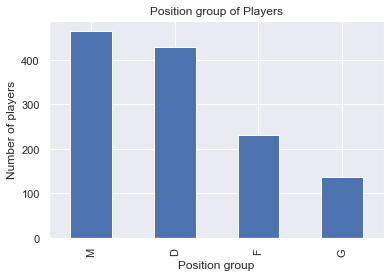

In [28]:
psm_df["Position group"].value_counts().plot(kind='bar')
plt.title('Position group of Players')
plt.xlabel('Position group')
plt.ylabel('Number of players');

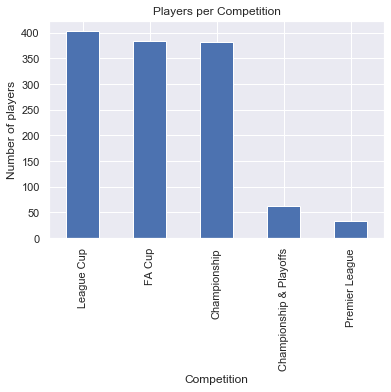

In [29]:
psm_df.Competition.value_counts().plot(kind='bar')
plt.title('Players per Competition')
plt.xlabel('Competition')
plt.ylabel('Number of players');

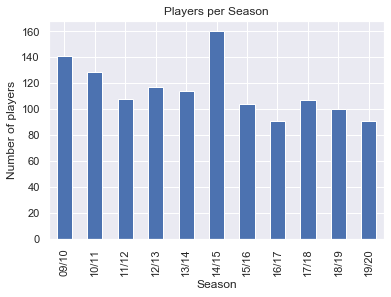

In [30]:
psm_df.Season.value_counts().sort_index().plot(kind='bar')
plt.title('Players per Season')
plt.xlabel('Season')
plt.ylabel('Number of players');

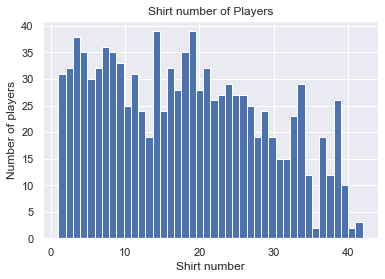

In [31]:
psm_df["Shirt number"].hist(bins=42)
plt.title('Shirt number of Players')
plt.xlabel('Shirt number')
plt.ylabel('Number of players');

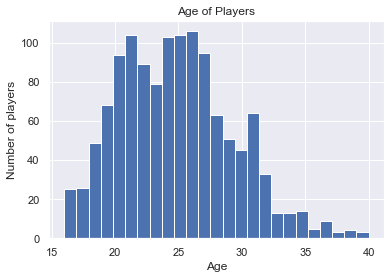

In [32]:
psm_df["Age"].hist(bins=25)
plt.title('Age of Players')
plt.xlabel('Age')
plt.ylabel('Number of players');

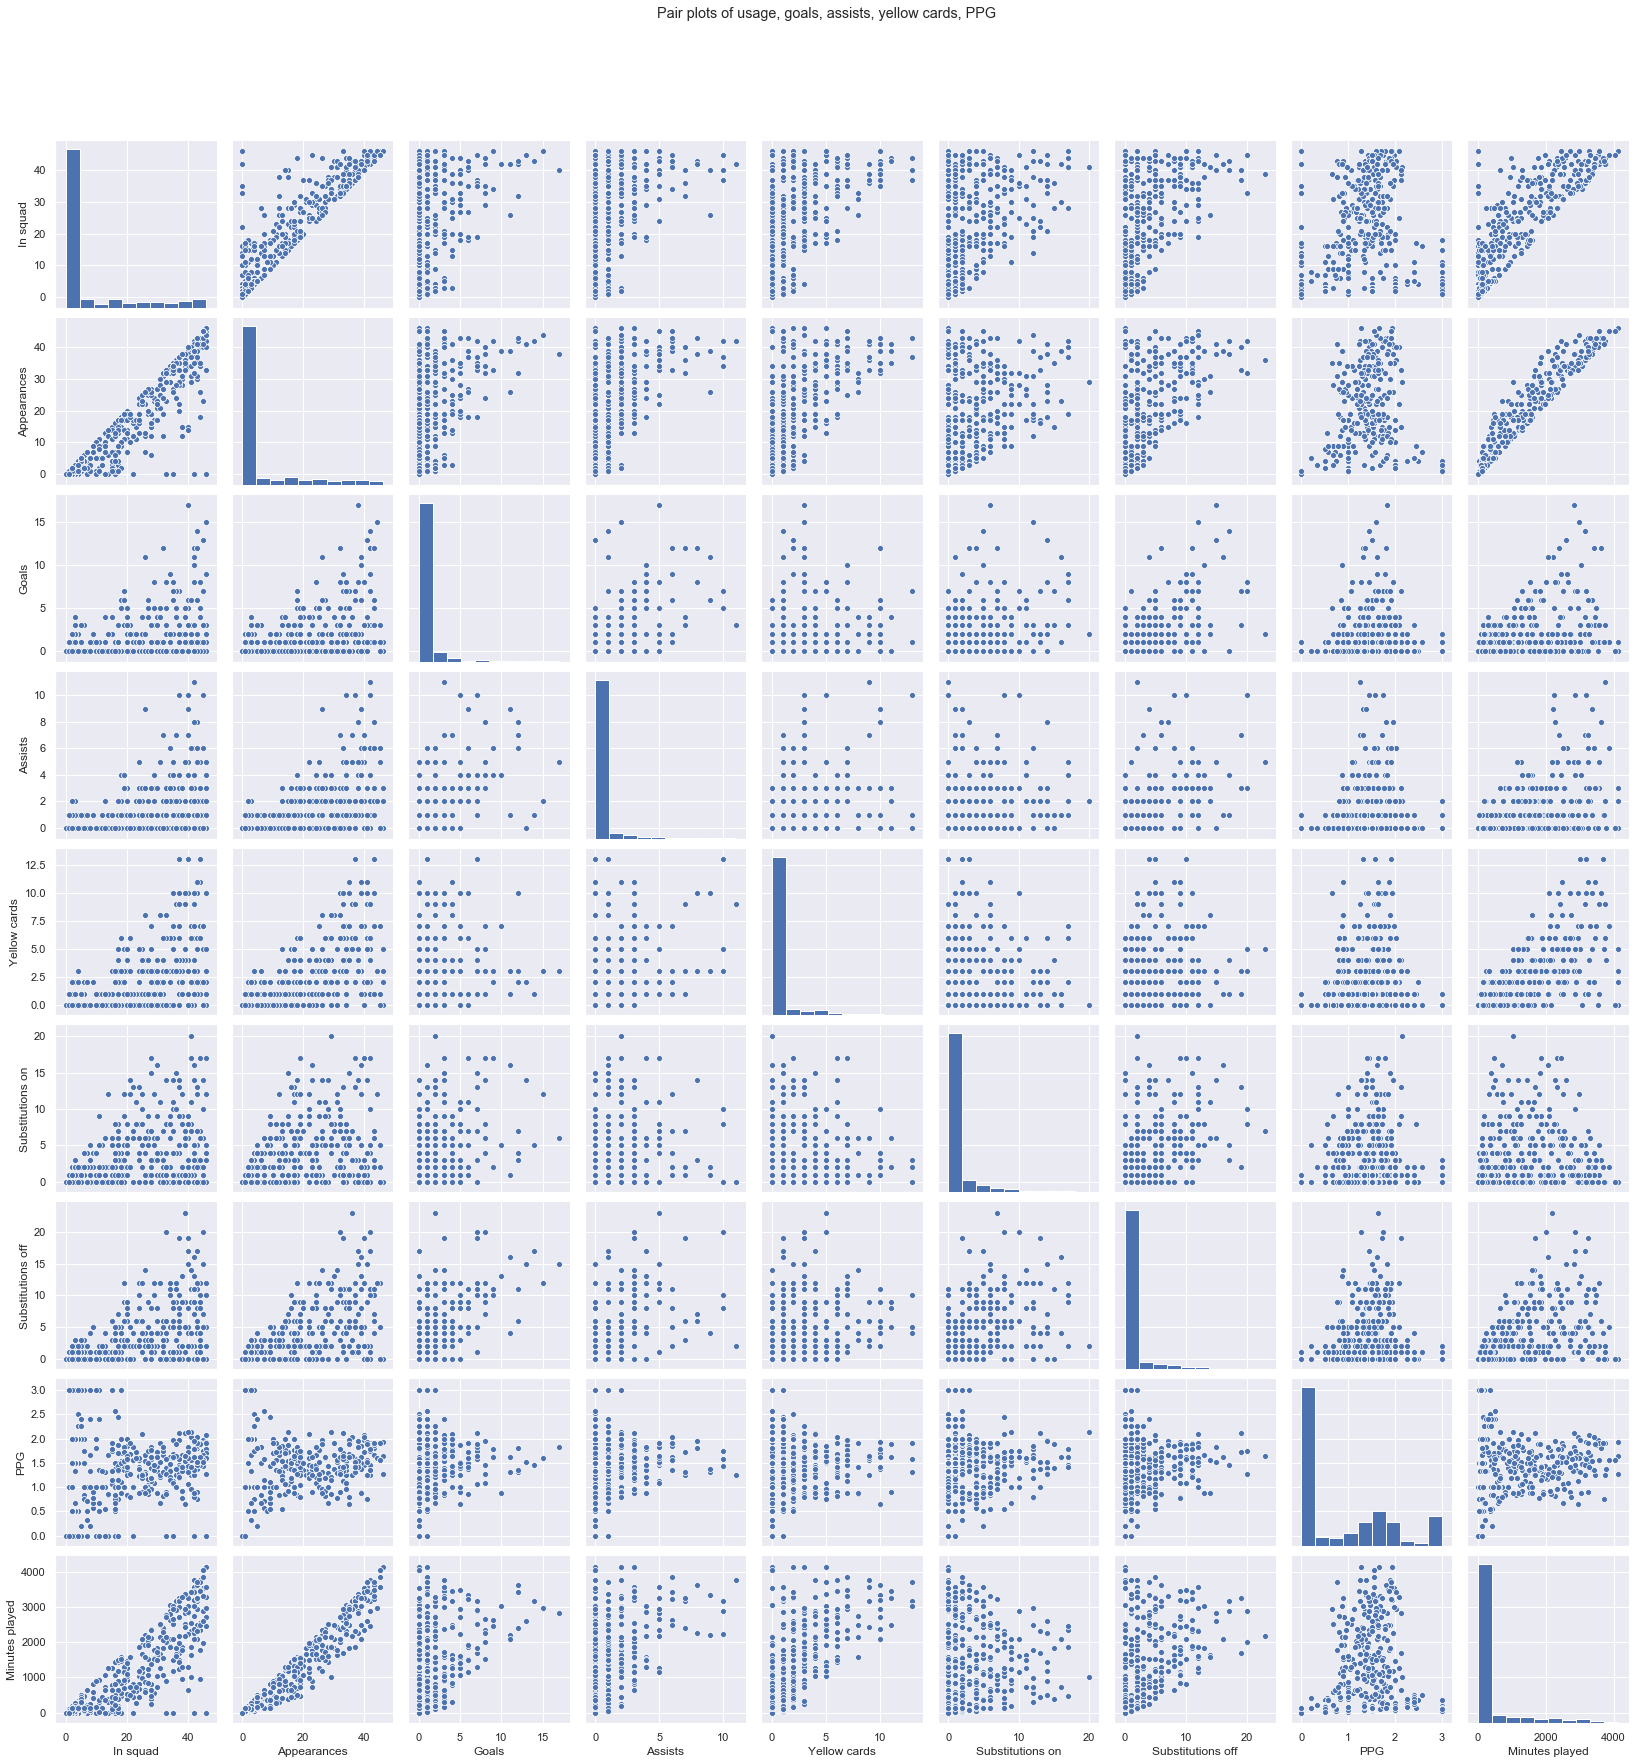

In [33]:
g = sns.pairplot(psm_df[["In squad", "Appearances", "Goals", "Assists", 
            "Yellow cards", #"Second yellow cards", "Red cards",
            "Substitutions on", "Substitutions off", "PPG", "Minutes played"]])
g.fig.suptitle("Pair plots of usage, goals, assists, yellow cards, PPG", y=1.08);

C:\Users\adeacon\AppData\Local\Continuum\miniconda3\envs\tbir\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


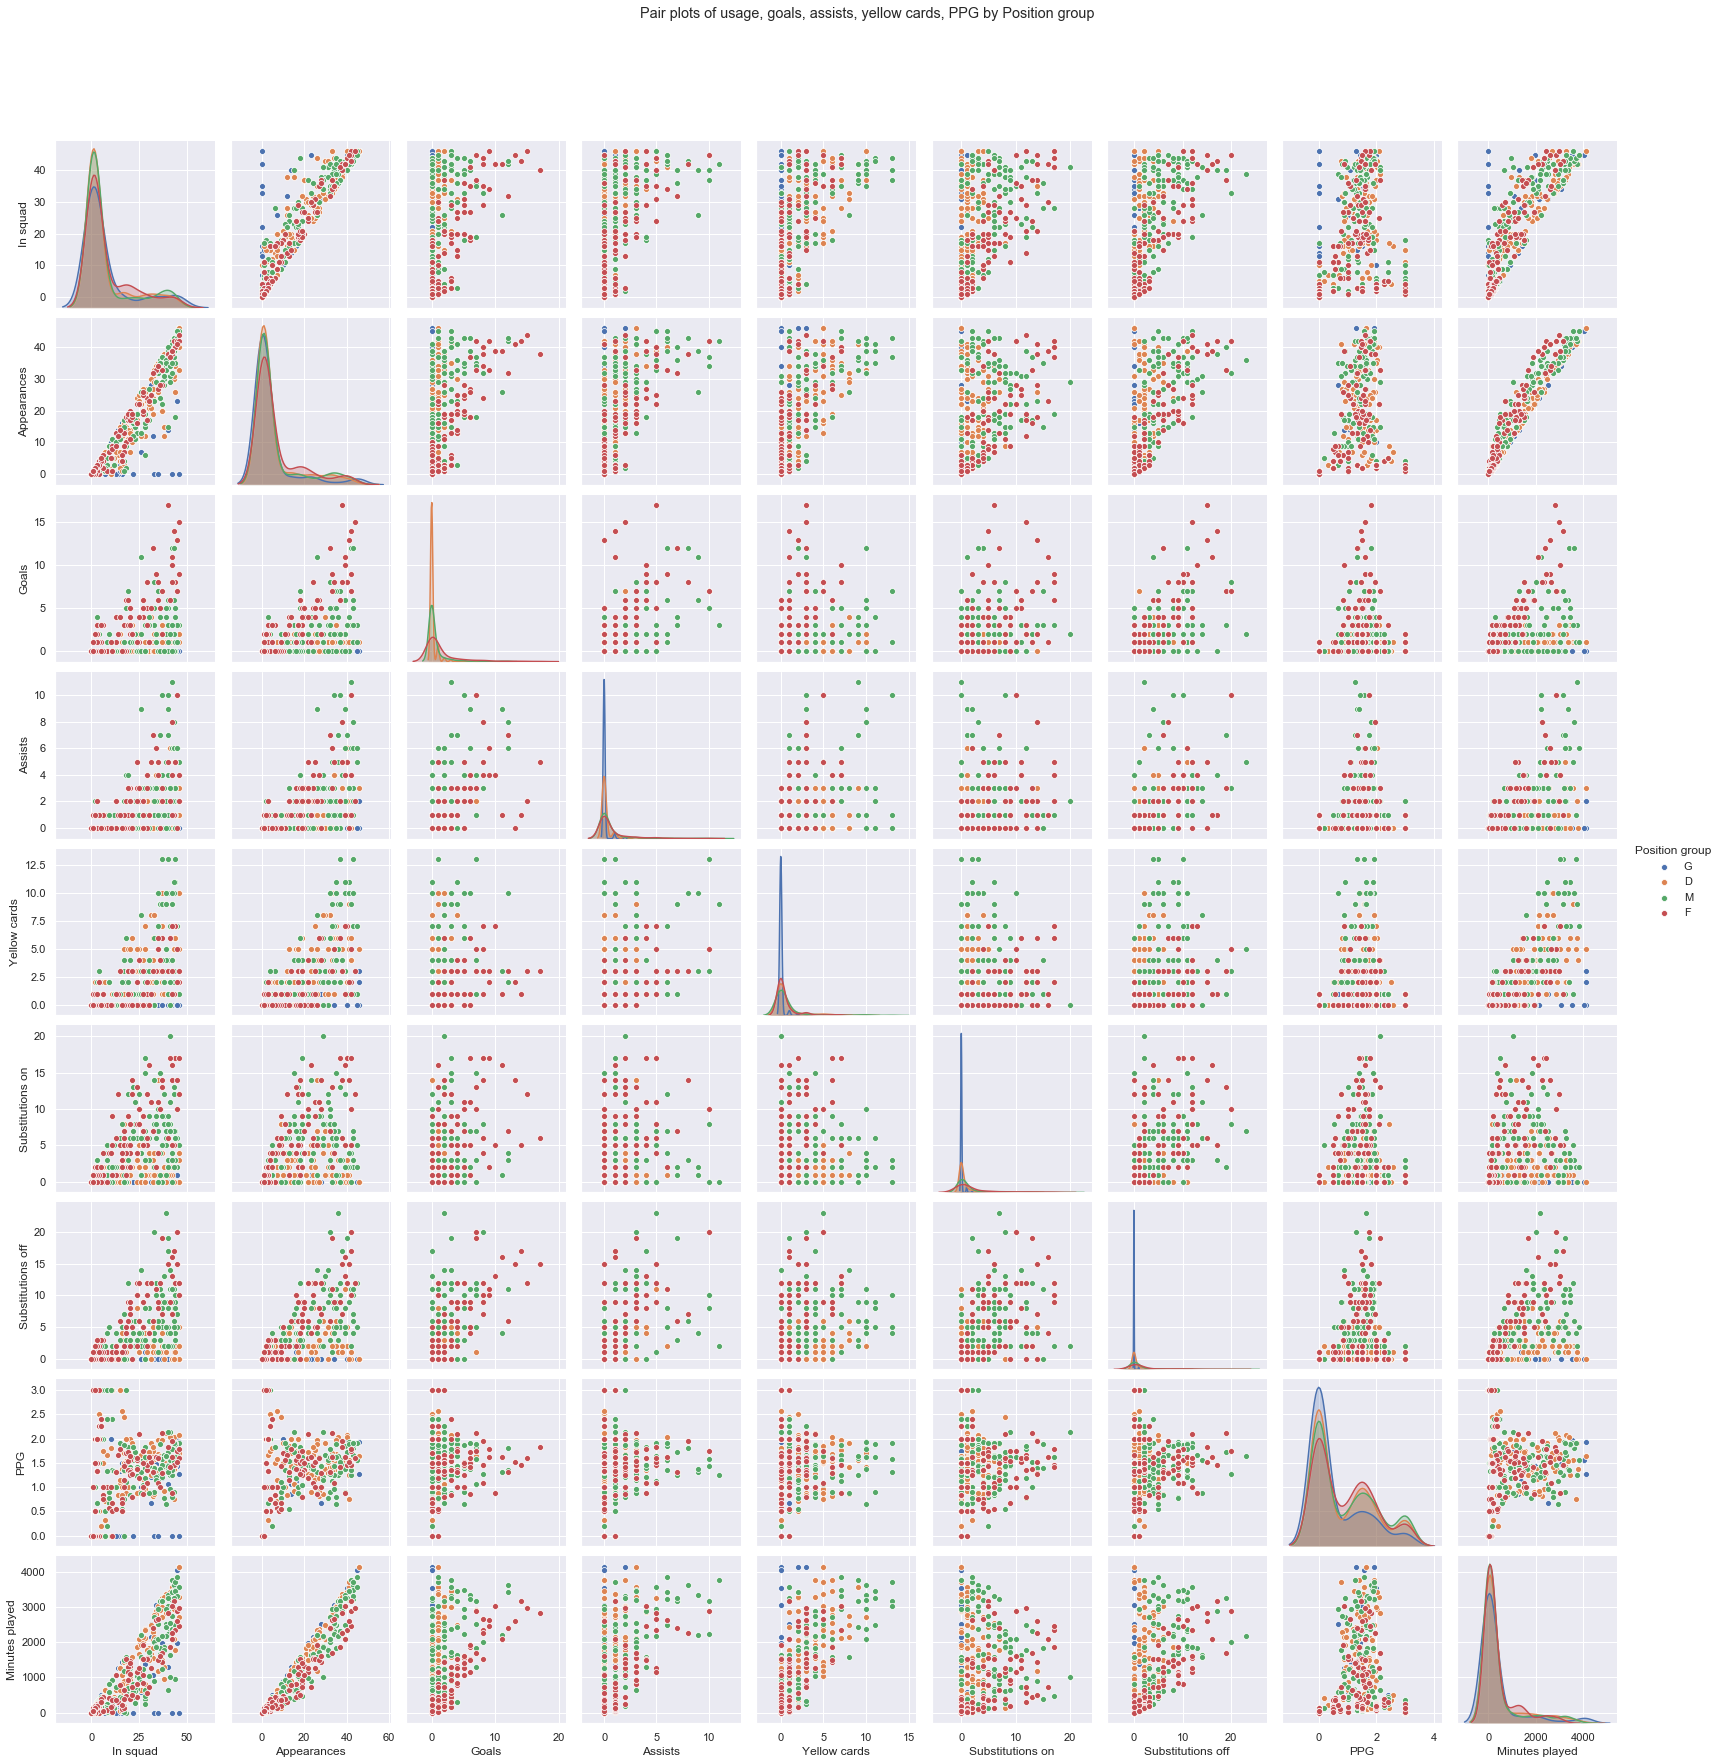

In [34]:
g = sns.pairplot(psm_df[["In squad", "Appearances", "Goals", "Assists", 
            "Yellow cards", "Substitutions on", "Substitutions off", "PPG", "Minutes played",
            "Position group"]], hue="Position group")
g.fig.suptitle("Pair plots of usage, goals, assists, yellow cards, PPG by Position group", y=1.08);

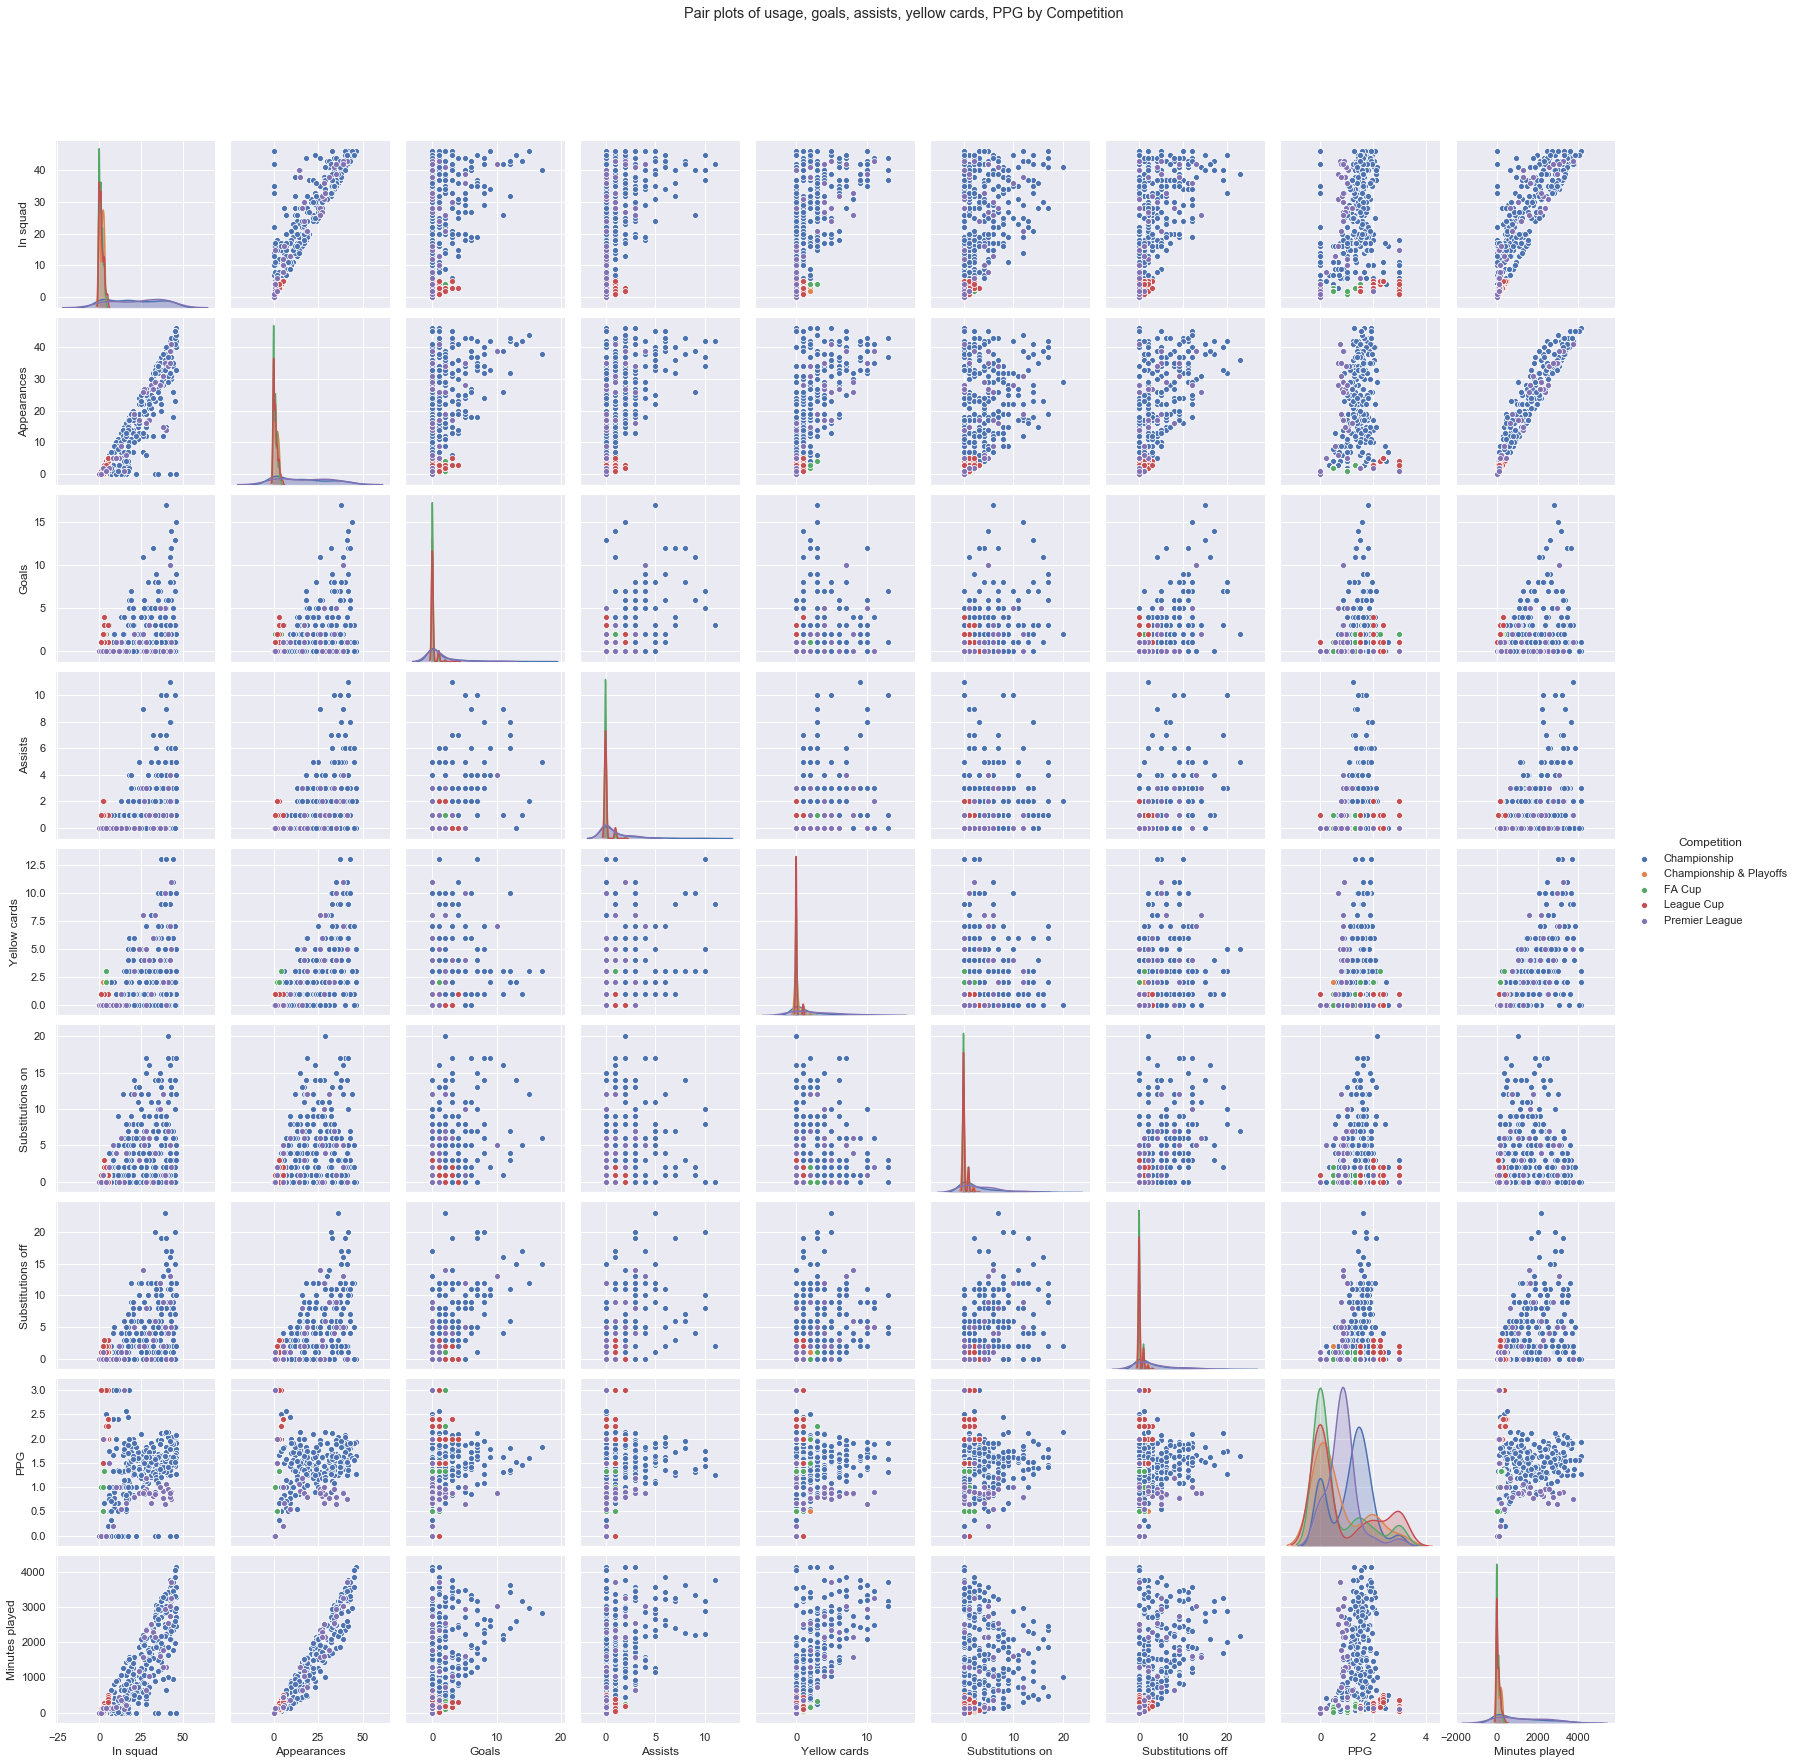

In [35]:
g = sns.pairplot(psm_df[["In squad", "Appearances", "Goals", "Assists", 
            "Yellow cards", "Substitutions on", "Substitutions off", "PPG", "Minutes played",
            "Competition"]], hue="Competition")
g.fig.suptitle("Pair plots of usage, goals, assists, yellow cards, PPG by Competition", y=1.08);

## 3. Data Preperation

* Select Data
* Clean Data
* Construct Data
* Integrate Data
* Format Data

In [36]:
df = tmk_df.copy()
# df.shape

df["Player key"] = df.Name + " (" + df.Season + ")"
df.set_index(df["Player key"], drop=True, inplace=True, verify_integrity=True)
df.drop(columns=["Player key"], inplace=True)

print("Final dataset created with index from {0} to {1}.".format(df.index[0], df.index[-1]))

Final dataset created with index from Brad Jones (09/10) to Rudy Gestede (19/20).


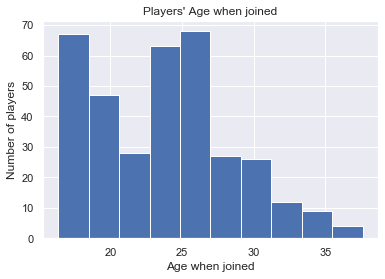

In [37]:
df["Age when joined"] = (df["Joined"] - df["Date of birth"])/ np.timedelta64(1, 'Y')
df["Age when joined"].hist()
plt.title("Players' Age when joined")
plt.xlabel('Age when joined')
plt.ylabel('Number of players');

**ANALYSIS:** Most players join in their teens or mid-twenties.

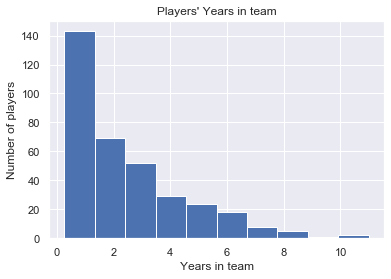

In [38]:
df["Years in team"] = (pd.to_datetime("1st July 20"+df.Season.str[-2:]) - df["Joined"])/ np.timedelta64(1, 'Y')
df["Years in team"].hist()
plt.title("Players' Years in team")
plt.xlabel('Years in team')
plt.ylabel('Number of players');

**ANALYSIS:** I'm going to leave out `Position`, `Date of birth`, `Joined`, and `Contract expires` from the model for now. `Contract expires` is populated in less than half of records. The others are encoded in derived features now.

In [39]:
df.drop(columns=["Position", "Name", "Date of birth", "Joined", "Season", "Contract expires"], inplace=True)
# df.shape

<s>**ANALYSIS:** `Foot` and `Position group` will be one-hot encoded</s>

In [40]:
# for var in ["Foot", "Position group"]:
#     df = pd.concat(
#         [
#             df.drop(var, axis=1),
#             pd.get_dummies(
#                 df[var], prefix=var, prefix_sep="=", drop_first=False
#             ),
#         ],
#         axis=1,
#     )

# df.describe()
# df.shape

In [41]:
psm_df.columns

Index(['Shirt number', 'Position', 'Name', 'Age', 'In squad', 'Appearances',
       'Goals', 'Assists', 'Yellow cards', 'Second yellow cards', 'Red cards',
       'Substitutions on', 'Substitutions off', 'PPG', 'Minutes played',
       'Season', 'Competition', 'Position group'],
      dtype='object')

In [42]:
def psm_agg(x):
    d = {}
    
    d["Shirt number"] = x["Shirt number"].max()
    d["Age"] = x["Age"].max()
    d["Position group"] = x["Position group"].max()
    
    d["In squad"] = x["In squad"].sum()
    d["Appearances"] = x["Appearances"].sum()
    d["Goals"] = x["Goals"].sum()
    d["Assists"] = x["Assists"].sum()
    d["Yellow cards"] = x["Yellow cards"].sum()
    d["Second yellow cards"] = x["Second yellow cards"].sum()
    d["Red cards"] = x["Red cards"].sum()
    d["Substitutions on"] = x["Substitutions on"].sum()
    d["Substitutions off"] = x["Substitutions off"].sum()
    d["Minutes played"] = x["Minutes played"].sum()
    
    d["PPG"] = ((x["PPG"] * x["Appearances"]).sum() / x["Appearances"].sum())
    
    d["Goals p90"] = x["Goals"].sum() * 90 / x["Minutes played"].sum()
    d["Assists p90"] = x["Assists"].sum() * 90 / x["Minutes played"].sum()
    d["Yellow cards p90"] = x["Yellow cards"].sum() * 90 / x["Minutes played"].sum()
    
    return pd.Series(d, index=["Shirt number", "Age", "Position group",
                                "In squad", "Appearances", "Goals", "Assists", 
                                    "Yellow cards", "Second yellow cards", "Red cards",
                                   "Substitutions on", "Substitutions off", "PPG", "Minutes played",
                              "Goals p90", "Assists p90", "Yellow cards p90"])

psm_agg?

Signature: psm_agg(x)
Docstring: <no docstring>
File:      c:\users\adeacon\documents\github\the-ball-is-round\notebooks\<ipython-input-42-bf3524f15c60>
Type:      function


In [43]:
df2 = psm_df.groupby(["Name", "Season"]).apply(psm_agg).fillna(0)
df2.reset_index(inplace=True)
df2["Player key"] = df2.Name + " (" + df2.Season + ")"
df2.set_index(df2["Player key"], drop=True, inplace=True, verify_integrity=True)
df2.drop(columns=["Player key", "Name", "Season"], inplace=True)

# df = pd.concat([df, df2], axis=1)
df = df.combine_first(df2)

<ipython-input-42-bf3524f15c60>:19: RuntimeWarning: invalid value encountered in double_scalars
  d["PPG"] = ((x["PPG"] * x["Appearances"]).sum() / x["Appearances"].sum())
<ipython-input-42-bf3524f15c60>:21: RuntimeWarning: invalid value encountered in double_scalars
  d["Goals p90"] = x["Goals"].sum() * 90 / x["Minutes played"].sum()
<ipython-input-42-bf3524f15c60>:22: RuntimeWarning: invalid value encountered in double_scalars
  d["Assists p90"] = x["Assists"].sum() * 90 / x["Minutes played"].sum()
<ipython-input-42-bf3524f15c60>:23: RuntimeWarning: invalid value encountered in double_scalars
  d["Yellow cards p90"] = x["Yellow cards"].sum() * 90 / x["Minutes played"].sum()


In [44]:
print("Random sample of records...")

df.sample(5, random_state=RANDOM_STATE)

Random sample of records...


Age  Age when joined  Appearances  Assists  Assists p90   Foot  Goals  Goals p90  Height  In squad  Market value  Minutes played       PPG Position group  Red cards  Second yellow cards  Shirt number  Substitutions off  Substitutions on  Years in team  Yellow cards  Yellow cards p90
Player key                                                                                                                                                                                                                                                                                                           
Barry Robson (11/12)     32.0        31.151906         39.0     10.0     0.271575   left    9.0   0.244418   180.0      39.0          1.13          3314.0  1.592051              M        1.0                  0.0          17.0               11.0               0.0       2.496971          13.0          0.353048
Adam Jackson (13/14)     19.0              NaN          0.0      0.0     0.000000    NaN    0.0   0.000000     NaN       2.0           NaN             0.0  0.000000              D        0.0                  0.0           0.0                0.0               0.0            NaN           0.0          0.000000
Stewart Downing (17/18)  33.0        30.982156         47.0      7.0     0.174226   left    3.0   0.074668   180.0      47.0          2.25          3616.0  1.685106              M        0.0                  0.0          19.0               19.0               6.0       2.959677           1.0          0.024889
Marvin Johnson (17/18)   27.0        26.749351         18.0      2.0     0.242915   left    1.0   0.121457   178.0      25.0          1.80           741.0  1.668333              M        0.0                  0.0          21.0                2.0              12.0       0.832324           0.0          0.000000
Sean St. Ledger (09/10)  24.0        24.715087         15.0      0.0     0.000000  right    2.0   0.141956   182.0      15.0          0.75          1268.0  1.070000              D        0.0                  0.0          12.0                0.0               1.0       0.791255           0.0          0.000000

In [45]:
print("Summary of whole dataset...")

df.describe(include="all")

Summary of whole dataset...


Age  Age when joined  Appearances     Assists  Assists p90   Foot       Goals   Goals p90      Height    In squad  Market value  Minutes played         PPG Position group   Red cards  Second yellow cards  Shirt number  Substitutions off  Substitutions on  Years in team  Yellow cards  Yellow cards p90
count   444.000000       351.000000   443.000000  443.000000   443.000000    324  443.000000  443.000000  356.000000  443.000000    330.000000      443.000000  443.000000            444  443.000000           443.000000    444.000000         443.000000        443.000000     351.000000    443.000000        443.000000
unique         NaN              NaN          NaN         NaN          NaN      3         NaN         NaN         NaN         NaN           NaN             NaN         NaN              4         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN
top            NaN              NaN          NaN         NaN          NaN  right         NaN         NaN         NaN         NaN           NaN             NaN         NaN              M         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN
freq           NaN              NaN          NaN         NaN          NaN    201         NaN         NaN         NaN         NaN           NaN             NaN         NaN            168         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN
mean     24.558559        23.871039    17.011287    1.194131     0.070201    NaN    1.550790    0.094877  183.286517   22.216704      1.696327     1235.817156    1.266512            NaN    0.056433             0.051919     14.493243           3.304740          3.304740       2.447119      2.011287          0.104350
std       4.635587         4.733915    15.677963    2.060897     0.138105    NaN    2.948889    0.184480    6.028752   16.937548      1.776398     1257.427002    0.840118            NaN    0.249838             0.241628     12.087620           4.533899          4.420709       2.005552      2.957062          0.162198
min      16.000000        16.356256     0.000000    0.000000     0.000000    NaN    0.000000    0.000000  167.000000    0.000000      0.038000        0.000000    0.000000            NaN    0.000000             0.000000      0.000000           0.000000          0.000000       0.265577      0.000000          0.000000
25%      21.000000        19.409023     2.000000    0.000000     0.000000    NaN    0.000000    0.000000  179.000000    6.000000      0.375000       96.000000    0.777071            NaN    0.000000             0.000000      3.000000           0.000000          0.000000       0.913092      0.000000          0.000000
50%      24.000000        23.907404    14.000000    0.000000     0.000000    NaN    0.000000    0.000000  183.000000   20.000000      1.130000      828.000000    1.352647            NaN    0.000000             0.000000     13.500000           2.000000          1.000000       1.960341      1.000000          0.025568
75%      27.000000        26.554960    29.000000    2.000000     0.107387    NaN    2.000000    0.110328  188.000000   37.000000      2.250000     2124.000000    1.696308            NaN    0.000000             0.000000     24.000000           5.000000          5.000000       3.422384      3.000000          0.173961
max      40.000000        37.607891    53.000000   12.000000     1.406250    NaN   19.000000    1.592920  199.000000   55.000000     10.800000     4770.000000    3.000000            NaN    2.000000             2.000000     42.000000          27.000000         22.000000      10.998172     13.000000          1.800000

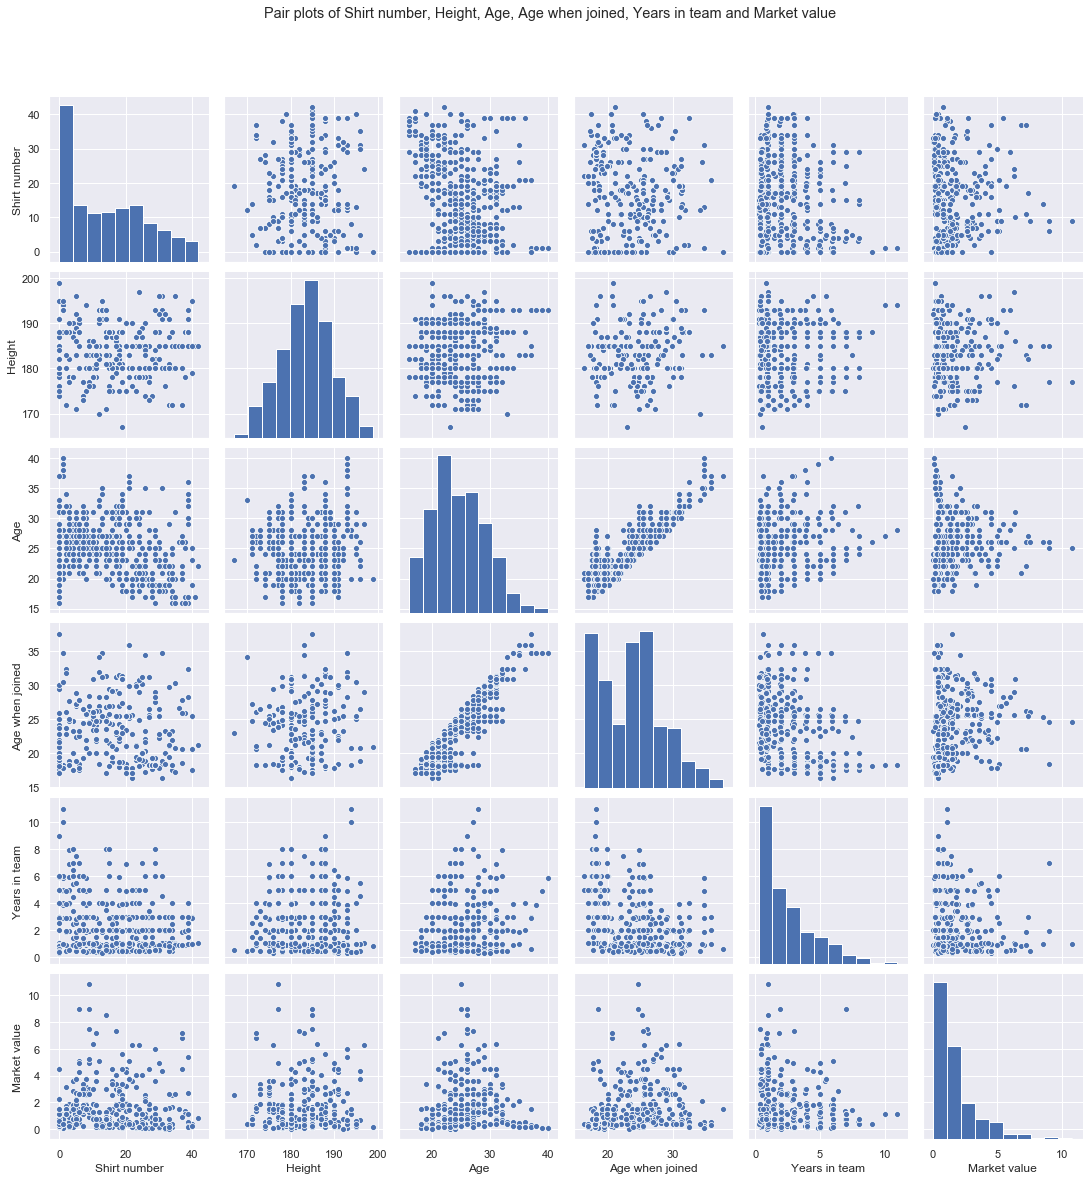

In [46]:
g = sns.pairplot(df[["Shirt number", "Height", "Age", "Age when joined", "Years in team", "Market value"]])
g.fig.suptitle("Pair plots of Shirt number, Height, Age, Age when joined, Years in team and Market value", y=1.08);

In [47]:
df.columns

Index(['Age', 'Age when joined', 'Appearances', 'Assists', 'Assists p90',
       'Foot', 'Goals', 'Goals p90', 'Height', 'In squad', 'Market value',
       'Minutes played', 'PPG', 'Position group', 'Red cards',
       'Second yellow cards', 'Shirt number', 'Substitutions off',
       'Substitutions on', 'Years in team', 'Yellow cards',
       'Yellow cards p90'],
      dtype='object')

In [48]:
df.shape

(444, 22)

## 4. Modelling

* Select Modelling Technique
* Generate Test Design
* Build Model
* Assess Model

In [49]:
numeric_features = ['Shirt number', 'Height', 'Age', 'Age when joined', 'Years in team', 
                    'In squad', 'Appearances', 'Goals', 'Assists', 'Yellow cards', 'Second yellow cards', 
                    'Red cards', 'Substitutions on', 'Substitutions off', 'PPG', 'Minutes played',
                   'Goals p90', 'Assists p90', 'Yellow cards p90']

print("\n")
print("Selected numeric features are: {0}".format(numeric_features))



Selected numeric features are: ['Shirt number', 'Height', 'Age', 'Age when joined', 'Years in team', 'In squad', 'Appearances', 'Goals', 'Assists', 'Yellow cards', 'Second yellow cards', 'Red cards', 'Substitutions on', 'Substitutions off', 'PPG', 'Minutes played', 'Goals p90', 'Assists p90', 'Yellow cards p90']


In [50]:
categorical_features = ['Foot', 'Position group']

print("\n")
print("Selected categorical features are: {0}".format(categorical_features))



Selected categorical features are: ['Foot', 'Position group']


In [51]:
feature_names = numeric_features + categorical_features

# print("\n")
# print("Selected features are: {0}".format(feature_names))

In [52]:
drop_nulls = False

print("\n")
print("Dropping nulls during data preparation: {0}".format(drop_nulls))



Dropping nulls during data preparation: False


In [53]:
if drop_nulls:
    X = df[df.notna().all(axis=1)][feature_names]
    y = df[df.notna().all(axis=1)]["Market value"]
else:
    X = df[df["Market value"].notna()][feature_names]
    y = df[df["Market value"].notna()]["Market value"]
    
# X.shape, y.shape

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, train_size=0.9)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape
print("\n")
print("Train data has shape: {0}".format(X_train.shape))
print("Test data has shape: {0}".format(X_test.shape))



Train data has shape: (297, 21)
Test data has shape: (33, 21)


In [55]:
number_of_folds = 10
# number_of_folds

In [56]:
kfold = KFold(n_splits=number_of_folds, shuffle=True, random_state=RANDOM_STATE)
# kfold

In [57]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LinearRegression())])

In [58]:
param_grid = {"estimator__fit_intercept": [True, False],
             "estimator__normalize": [True, False],}
# param_grid

In [59]:
grid = GridSearchCV(model, param_grid, cv=kfold)
# grid

In [60]:
print("\n")
print("Full model grid-space to tune hyperparameters across...")
grid.fit(X_train, y_train)



Full model grid-space to tune hyperparameters across...


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                           

In [61]:
# grid.best_params_

In [62]:
final_model = grid.best_estimator_
# final_model

In [63]:
print("\n")
print("Final tuned model...")
final_model.fit(X_train, y_train)



Final tuned model...


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

## 5. Evaluation

* Evaluate Results
* Review Process
* Determine Next Steps

In [64]:
def model_scores(y_act, y_pred):
    """
    INPUT:
        y_act - Actual values from target vector
        y_pred - Predicted values from target vector
        
    OUTPUT:
        Dictionary containing multiple scoring metrics with nice labels as keys
    """
    
    return {"MedAE": median_absolute_error(y_act, y_pred),
            "RMSE": mean_squared_error(y_act, y_pred, squared=False),
            "R^2": r2_score(y_act, y_pred),
           }

# model_scores?

In [65]:
print("Model scores")

pd.DataFrame(
    [model_scores(y_train, final_model.predict(X_train)), 
    model_scores(y_test, final_model.predict(X_test))], 
    index=["Train", "Test"]
    ).T

Model scores


Train      Test
MedAE  0.754949  1.154259
RMSE   1.376285  1.988585
R^2    0.378160  0.002359

**ANALYSIS:** After we added more preprocessing (missing value imputer, scaling and OHE) the training and test scores  balanced out but now - after adding additional features - the training score has got much better whilst the test score has dropped off so we are quite possibly overfitting.

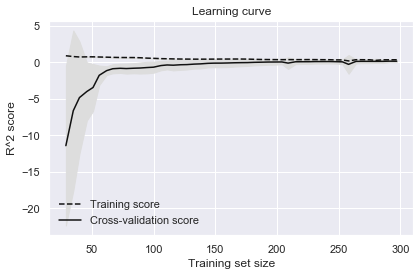

In [66]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(final_model, 
                                                        X, 
                                                        y,
                                                        cv=kfold,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.1, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning curve")
plt.xlabel("Training set size"), plt.ylabel("R^2 score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**ANALYSIS:** The model seems pretty weak in general but we can say the learning curves have largely converged so adding extra training samples is unlikely to improve the model.

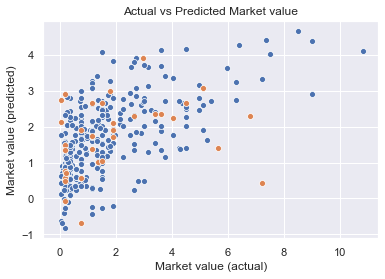

In [67]:
sns.scatterplot(y_train, final_model.predict(X_train))
sns.scatterplot(y_test, final_model.predict(X_test))

plt.title('Actual vs Predicted Market value')
plt.xlabel('Market value (actual)')
plt.ylabel('Market value (predicted)');

**ANALYSIS:** Confirming our scoring visually, it looks pretty weak correlation between actual and predicted values. Note also the model is not able to predict anything much above £4m even though some of the data exceeded £10m.

In [68]:
transformed_features = list(numeric_features) \
    + final_model['preprocessor'].transformers_[1][1]['onehot']\
                         .get_feature_names(categorical_features).tolist()
# transformed_features

params = pd.Series(final_model.named_steps["estimator"].coef_, index=transformed_features)
# params

np.random.seed(1)
err = np.std([final_model.fit(*resample(X, y)).named_steps["estimator"].coef_ for i in range(1000)], 0)
# err

print("Effect of each feature on the model")
pd.DataFrame({"effect": params.round(2), "error": err.round(2)})

Effect of each feature on the model


effect         error
Shirt number          -0.19  3.200000e-01
Height                 0.82  5.700000e-01
Age                   19.89  4.210000e+00
Age when joined      -18.58  4.130000e+00
Years in team        -10.12  2.230000e+00
In squad              -0.72  5.600000e-01
Appearances            3.10  8.440000e+00
Goals                 -0.19  1.510000e+00
Assists               -2.04  1.050000e+00
Yellow cards           0.34  7.800000e-01
Second yellow cards   -0.75  6.200000e-01
Red cards             -0.80  8.300000e-01
Substitutions on      -1.90  2.680000e+00
Substitutions off      0.97  1.200000e+00
PPG                   -0.43  3.400000e-01
Minutes played        -0.29  8.370000e+00
Goals p90              4.35  2.340000e+00
Assists p90           -0.19  7.600000e-01
Yellow cards p90      -0.23  9.200000e-01
Foot_both             -0.39  2.207776e+13
Foot_left              0.18  2.207776e+13
Foot_missing          -0.02  2.207776e+13
Foot_right             0.24  2.207776e+13
Position group_D      -0.14  3.358985e+13
Position group_F       0.75  3.358985e+13
Position group_G      -0.94  3.358985e+13
Position group_M       0.33  3.358985e+13

**ANALYSIS:** The individual features which appear to have most effect are `Age`, `Age when joined` and `Years in team`. Perhaps the most we can say is old players are cheap. `Appearances` and `Goals p90` are starting to show some effect - which is as expected.

## 6. Deployment

* Plan Deployment
* Plan Monitoring and Maintenance
* Produce Final Report
* Review Project

In [69]:
df_out = df.copy()
# df_out.shape

In [70]:
if drop_nulls:
    df_out["Market value (prediction)"] = np.NaN
    df_out.loc[df_out.notna()[feature_names].all(axis=1), "Market value (prediction)"] = final_model.predict(df_out[df_out.notna()[feature_names].all(axis=1)][feature_names])
else:
    df_out["Market value (prediction)"] = final_model.predict(df_out[feature_names])

# df_out.shape

In [71]:
print("Summary of whole dataset (with predictions)...")

df_out.describe(include="all")

Summary of whole dataset (with predictions)...


Age  Age when joined  Appearances     Assists  Assists p90   Foot       Goals   Goals p90      Height    In squad  Market value  Minutes played         PPG Position group   Red cards  Second yellow cards  Shirt number  Substitutions off  Substitutions on  Years in team  Yellow cards  Yellow cards p90  Market value (prediction)
count   444.000000       351.000000   443.000000  443.000000   443.000000    324  443.000000  443.000000  356.000000  443.000000    330.000000      443.000000  443.000000            444  443.000000           443.000000    444.000000         443.000000        443.000000     351.000000    443.000000        443.000000                 444.000000
unique         NaN              NaN          NaN         NaN          NaN      3         NaN         NaN         NaN         NaN           NaN             NaN         NaN              4         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
top            NaN              NaN          NaN         NaN          NaN  right         NaN         NaN         NaN         NaN           NaN             NaN         NaN              M         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
freq           NaN              NaN          NaN         NaN          NaN    201         NaN         NaN         NaN         NaN           NaN             NaN         NaN            168         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
mean     24.558559        23.871039    17.011287    1.194131     0.070201    NaN    1.550790    0.094877  183.286517   22.216704      1.696327     1235.817156    1.266512            NaN    0.056433             0.051919     14.493243           3.304740          3.304740       2.447119      2.011287          0.104350                   0.991240
std       4.635587         4.733915    15.677963    2.060897     0.138105    NaN    2.948889    0.184480    6.028752   16.937548      1.776398     1257.427002    0.840118            NaN    0.249838             0.241628     12.087620           4.533899          4.420709       2.005552      2.957062          0.162198                   2.417262
min      16.000000        16.356256     0.000000    0.000000     0.000000    NaN    0.000000    0.000000  167.000000    0.000000      0.038000        0.000000    0.000000            NaN    0.000000             0.000000      0.000000           0.000000          0.000000       0.265577      0.000000          0.000000                  -8.229301
25%      21.000000        19.409023     2.000000    0.000000     0.000000    NaN    0.000000    0.000000  179.000000    6.000000      0.375000       96.000000    0.777071            NaN    0.000000             0.000000      3.000000           0.000000          0.000000       0.913092      0.000000          0.000000                   0.500853
50%      24.000000        23.907404    14.000000    0.000000     0.000000    NaN    0.000000    0.000000  183.000000   20.000000      1.130000      828.000000    1.352647            NaN    0.000000             0.000000     13.500000           2.000000          1.000000       1.960341      1.000000          0.025568                   1.516761
75%      27.000000        26.554960    29.000000    2.000000     0.107387    NaN    2.000000    0.110328  188.000000   37.000000      2.250000     2124.000000    1.696308            NaN    0.000000             0.000000     24.000000           5.000000          5.000000       3.422384      3.000000          0.173961                   2.244935
max      40.000000        37.607891    53.000000   12.000000     1.406250    NaN   19.000000    1.592920  199.000000   55.000000     10.800000     4770.000000    3.000000            NaN    2.000000             2.000000     42.00000

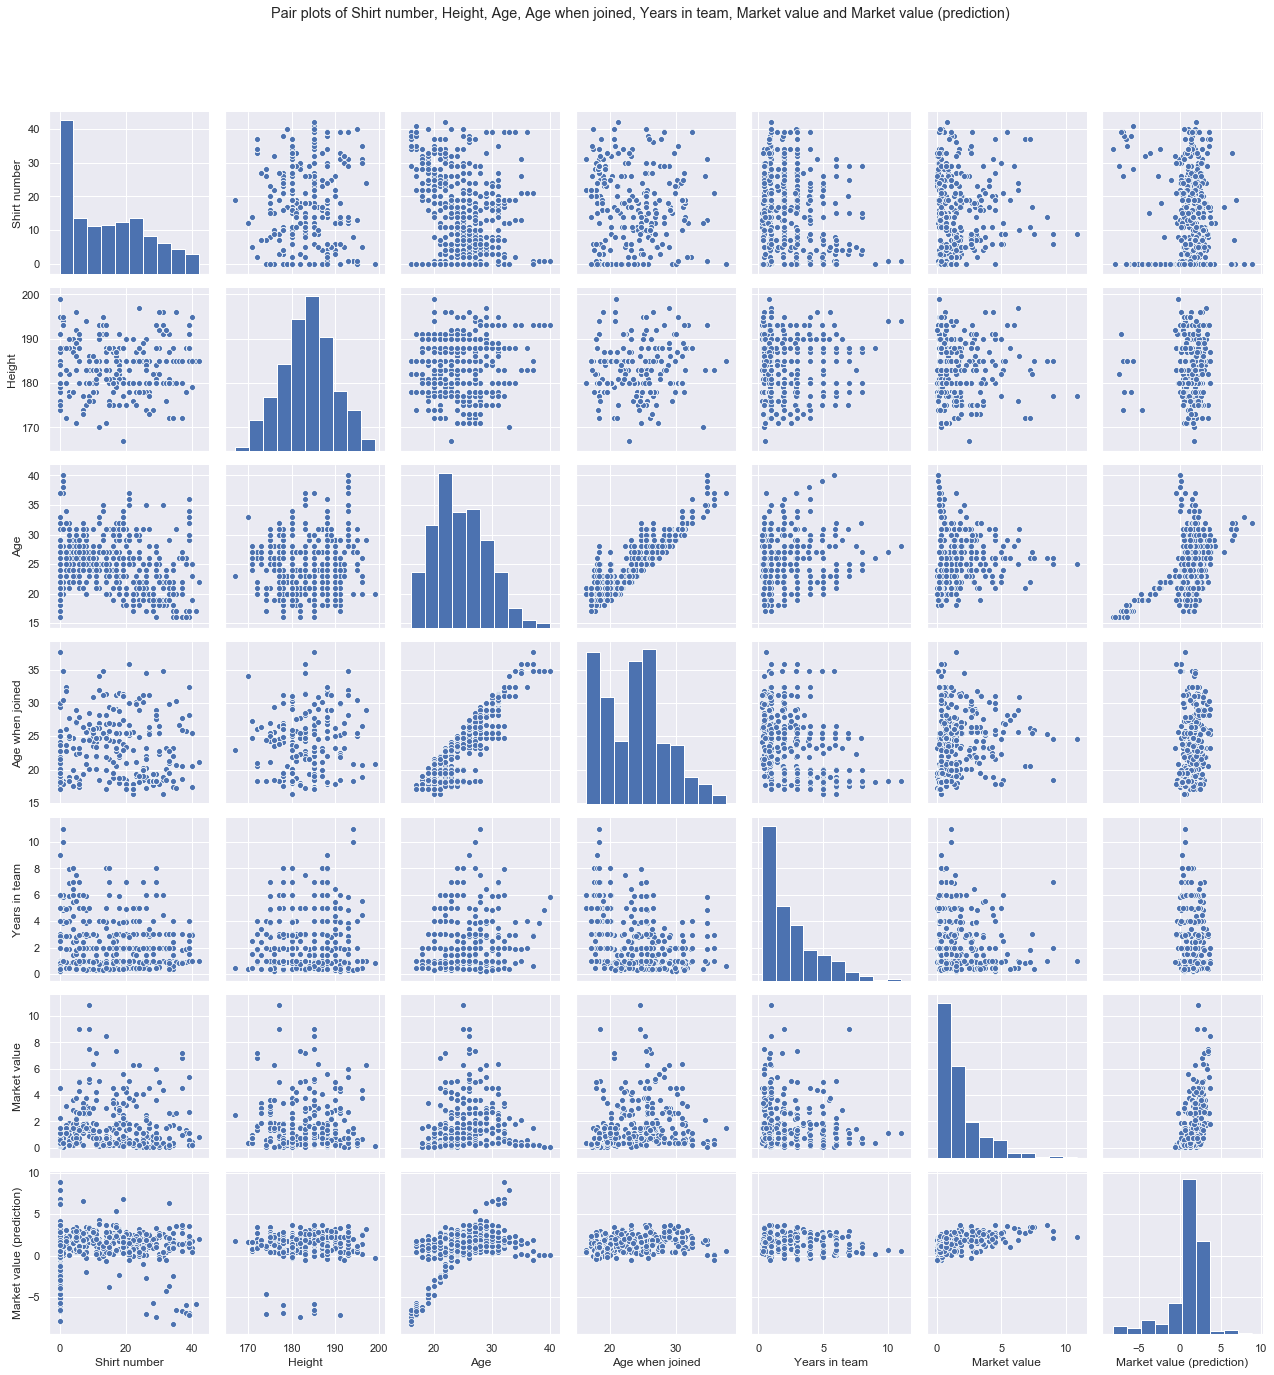

In [72]:
g = sns.pairplot(df_out[["Shirt number", "Height", "Age", "Age when joined", "Years in team", "Market value", "Market value (prediction)"]])
g.fig.suptitle("Pair plots of Shirt number, Height, Age, Age when joined, Years in team, Market value and Market value (prediction)", y=1.08);

**ANALYSIS:** As we saw during data preparation there's no clear correlations with continuous features at work. Further our predictions don't even particularly correlate with the actual values. We're also seeing some particular poor (negative) estimates for some young players.

In [73]:
df_unseen = df_out[df_out["Market value"].isna()]
# df_unseen.shape

In [74]:
print("Summary of unseen records in dataset (no labels)...")

df_unseen[df_unseen["Market value (prediction)"].notna()].describe(include="all")

Summary of unseen records in dataset (no labels)...


Age  Age when joined  Appearances     Assists  Assists p90  Foot       Goals   Goals p90      Height    In squad  Market value  Minutes played         PPG Position group   Red cards  Second yellow cards  Shirt number  Substitutions off  Substitutions on  Years in team  Yellow cards  Yellow cards p90  Market value (prediction)
count   114.000000        21.000000   114.000000  114.000000    114.00000    22  114.000000  114.000000   28.000000  114.000000           0.0      114.000000  114.000000            114  114.000000                114.0    114.000000         114.000000        114.000000      21.000000    114.000000        114.000000                 114.000000
unique         NaN              NaN          NaN         NaN          NaN     2         NaN         NaN         NaN         NaN           NaN             NaN         NaN              4         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
top            NaN              NaN          NaN         NaN          NaN  left         NaN         NaN         NaN         NaN           NaN             NaN         NaN              M         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
freq           NaN              NaN          NaN         NaN          NaN    12         NaN         NaN         NaN         NaN           NaN             NaN         NaN             49         NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
mean     21.745614        18.725068     5.561404    0.342105      0.04755   NaN    0.570175    0.077833  182.178571    8.842105           NaN      368.982456    1.049908            NaN    0.008772                  0.0     11.385965           1.307018          1.535088       1.486032      0.605263          0.043631                  -0.836610
std       4.333062         1.369572     8.245176    1.071175      0.17664   NaN    1.528313    0.210015    5.683332    9.745050           NaN      627.435573    1.112283            NaN    0.093659                  0.0     14.491077           2.664507          2.535342       0.997234      1.686062          0.099482                   3.987373
min      16.000000        17.054423     0.000000    0.000000      0.00000   NaN    0.000000    0.000000  172.000000    0.000000           NaN        0.000000    0.000000            NaN    0.000000                  0.0      0.000000           0.000000          0.000000       0.334025      0.000000          0.000000                  -8.229301
25%      19.000000        17.686879     0.000000    0.000000      0.00000   NaN    0.000000    0.000000  178.000000    1.000000           NaN        0.000000    0.000000            NaN    0.000000                  0.0      0.000000           0.000000          0.000000       0.991122      0.000000          0.000000                  -3.888580
50%      20.500000        18.404211     2.000000    0.000000      0.00000   NaN    0.000000    0.000000  182.500000    4.000000           NaN       83.500000    0.831667            NaN    0.000000                  0.0      0.000000           0.000000          0.500000       0.999336      0.000000          0.000000                  -0.554748
75%      24.750000        19.055833     7.750000    0.000000      0.00000   NaN    0.000000    0.000000  185.000000   14.750000           NaN      409.500000    1.904308            NaN    0.000000                  0.0     25.000000           1.000000          2.000000       2.001410      0.000000          0.000000                   1.743574
max      33.000000        21.881353    46.000000    9.000000      1.40625   NaN   11.000000    1.592920  196.000000   50.000000           NaN     3866.000000    3.000000            NaN    1.000000                  0.0     41.000000          1

**ANALYSIS:** The player's missing actual Market values are mostly young players. THere's now a broad range of predictions from £8m all the way down to -£8m!

In [75]:
print("Predictions below zero")

df_unseen[df_unseen["Market value (prediction)"] < 0.0].describe(include="all")
# pd.DataFrame(df_unseen.loc['Connor Ripley (11/12)'])

Predictions below zero


Age  Age when joined  Appearances    Assists  Assists p90  Foot      Goals  Goals p90      Height   In squad  Market value  Minutes played        PPG Position group  Red cards  Second yellow cards  Shirt number  Substitutions off  Substitutions on  Years in team  Yellow cards  Yellow cards p90  Market value (prediction)
count   60.000000         2.000000    60.000000  60.000000    60.000000     8  60.000000  60.000000   11.000000  60.000000           0.0       60.000000  60.000000             60  60.000000                 60.0     60.000000          60.000000         60.000000       2.000000     60.000000         60.000000                  60.000000
unique        NaN              NaN          NaN        NaN          NaN     2        NaN        NaN         NaN        NaN           NaN             NaN        NaN              4        NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
top           NaN              NaN          NaN        NaN          NaN  left        NaN        NaN         NaN        NaN           NaN             NaN        NaN              M        NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
freq          NaN              NaN          NaN        NaN          NaN     5        NaN        NaN         NaN        NaN           NaN             NaN        NaN             26        NaN                  NaN           NaN                NaN               NaN            NaN           NaN               NaN                        NaN
mean    19.416667        18.680740     3.450000   0.250000     0.041603   NaN   0.316667   0.034494  181.909091   6.850000           NaN      213.033333   1.032887            NaN   0.016667                  0.0     10.733333           0.666667          1.166667       1.002074      0.283333          0.029905                  -4.000841
std      2.149432         0.429790     6.040611   1.202046     0.191779   NaN   1.467058   0.108996    6.040771   7.925126           NaN      466.480220   1.221993            NaN   0.129099                  0.0     15.219152           1.398142          2.308178       0.000000      0.958312          0.092842                   2.127178
min     16.000000        18.376832     0.000000   0.000000     0.000000   NaN   0.000000   0.000000  174.000000   0.000000           NaN        0.000000   0.000000            NaN   0.000000                  0.0      0.000000           0.000000          0.000000       1.002074      0.000000          0.000000                  -8.229301
25%     17.750000        18.528786     0.000000   0.000000     0.000000   NaN   0.000000   0.000000  178.000000   1.000000           NaN        0.000000   0.000000            NaN   0.000000                  0.0      0.000000           0.000000          0.000000       1.002074      0.000000          0.000000                  -5.832809
50%     19.000000        18.680740     1.000000   0.000000     0.000000   NaN   0.000000   0.000000  182.000000   3.000000           NaN       27.500000   0.450000            NaN   0.000000                  0.0      0.000000           0.000000          0.000000       1.002074      0.000000          0.000000                  -3.835552
75%     21.000000        18.832693     4.000000   0.000000     0.000000   NaN   0.000000   0.000000  185.000000  10.250000           NaN      198.000000   2.270833            NaN   0.000000                  0.0     26.000000           1.000000          1.000000       1.002074      0.000000          0.000000                  -2.389598
max     24.000000        18.984647    28.000000   9.000000     1.406250   NaN  11.000000   0.500000  191.000000  30.000000           NaN     2520.000000   3.000000            NaN   1.000000                  0.0     41.000000           6.000000         14.000000       1.002074      6.000000          0.500000          

**ANALYSIS:** The model seems to particularly struggle with young players who we don't have much information about.

In [76]:
df_out.to_csv("../data/interim/boro_01_dataset.csv")

In [77]:
clf_file = "../models/boro_01_model.pkl" 
with open(clf_file, "wb") as clf_outfile:
    pickle.dump(final_model, clf_outfile)

In [78]:
ftn_file = "../models/boro_01_feature_names.pkl" 
with open(ftn_file, "wb") as ftn_outfile:
    pickle.dump(feature_names, ftn_outfile)

In [79]:
## save notebook before running `nbconvert`

In [80]:
outFolder = './output'
for filename in os.listdir(outFolder):
    file_path = os.path.join(outFolder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [81]:
!jupyter nbconvert --no-input --output-dir='./output' --to markdown boro_01_current_market_value.ipynb

[NbConvertApp] Converting notebook boro_01_current_market_value.ipynb to markdown
[NbConvertApp] Support files will be in boro_01_current_market_value_files\
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbConvertApp] Making directory ./output\boro_01_current_market_value_files
[NbCon

In [82]:
!jupyter nbconvert --output-dir='./output' --to python boro_01_current_market_value.ipynb

[NbConvertApp] Converting notebook boro_01_current_market_value.ipynb to python
[NbConvertApp] Writing 21999 bytes to ./output\boro_01_current_market_value.py
